Saving employee_data - employee_data.csv to employee_data - employee_data.csv
Summary Statistics:
        EmployeeID          Name         Age   Department        Salary  \
count   100.000000           100  100.000000          100    100.000000   
unique         NaN            98         NaN            4           NaN   
top            NaN  James Walker         NaN  Engineering           NaN   
freq           NaN             2         NaN           28           NaN   
mean     50.500000           NaN   36.570000          NaN  72820.000000   
std      29.011492           NaN    8.318478          NaN  12643.823102   
min       1.000000           NaN   25.000000          NaN  43000.000000   
25%      25.750000           NaN   29.750000          NaN  65000.000000   
50%      50.500000           NaN   35.000000          NaN  72000.000000   
75%      75.250000           NaN   41.250000          NaN  82750.000000   
max     100.000000           NaN   60.000000          NaN  95000.000000   

 

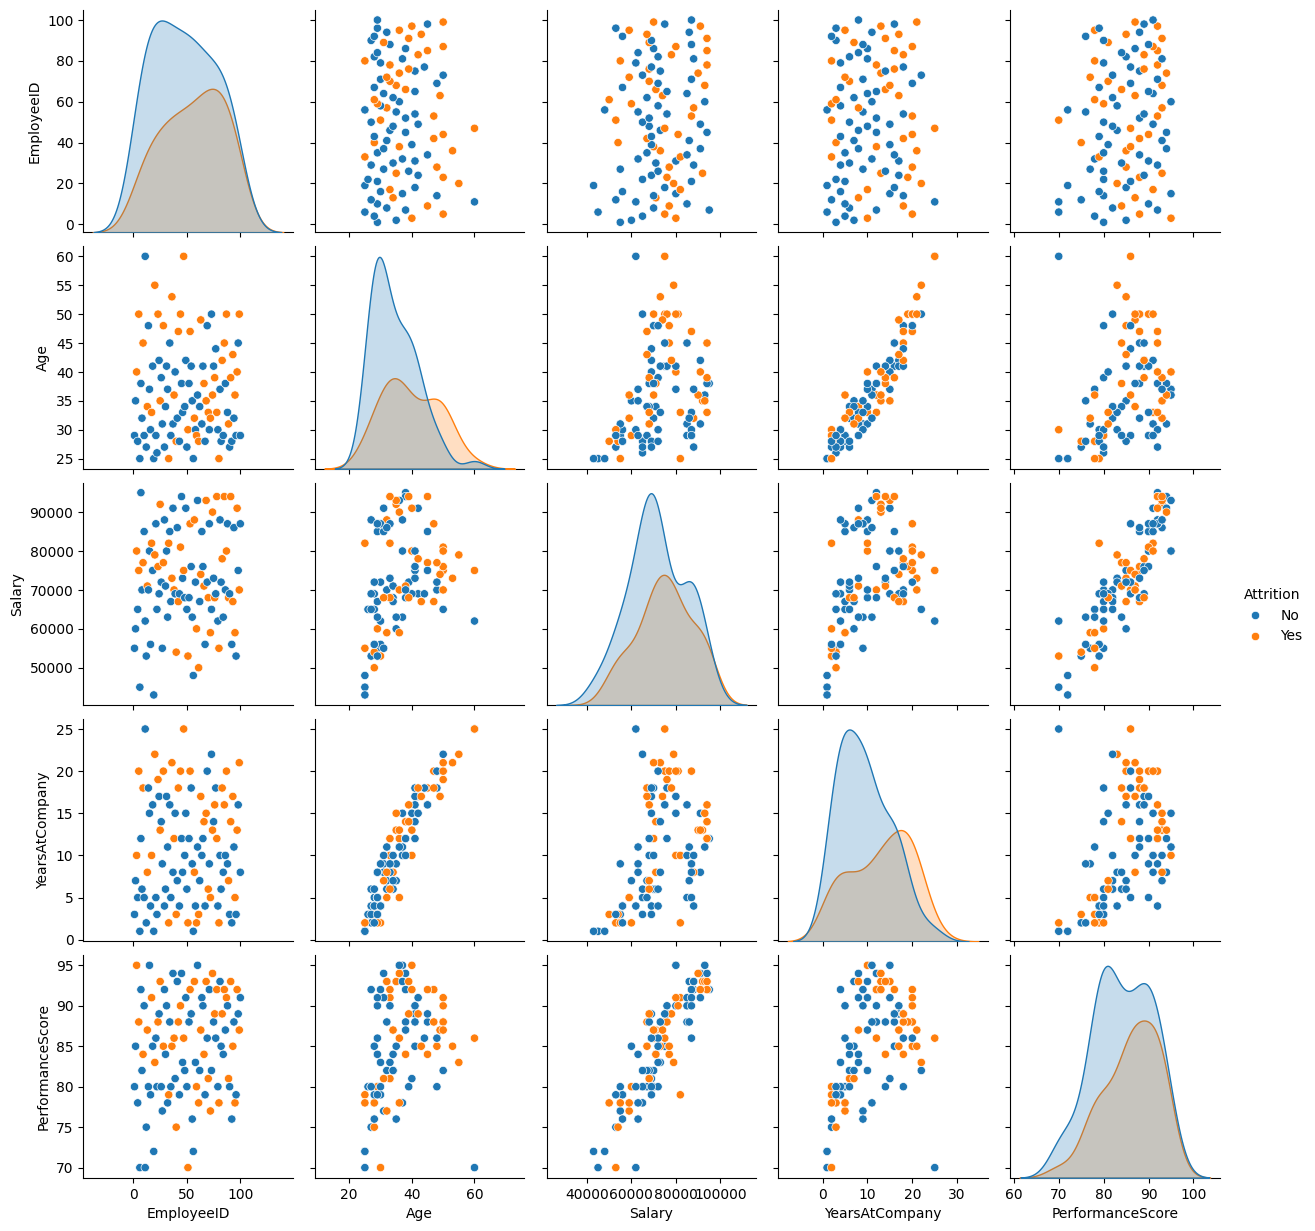

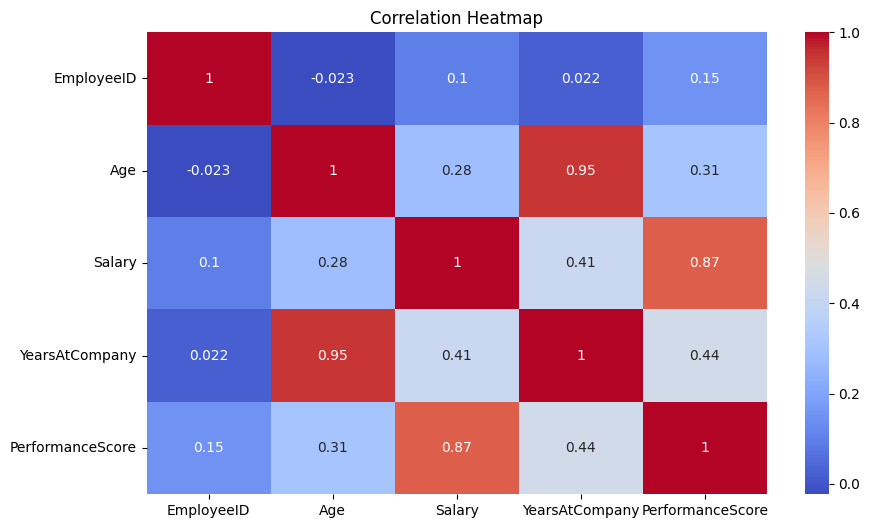

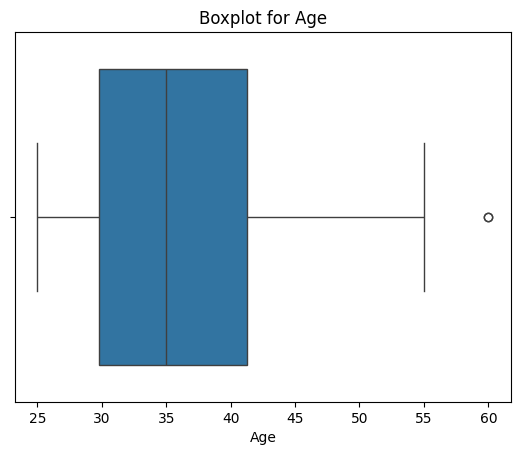

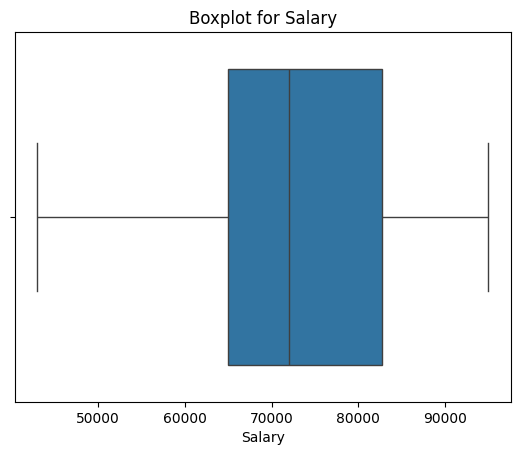

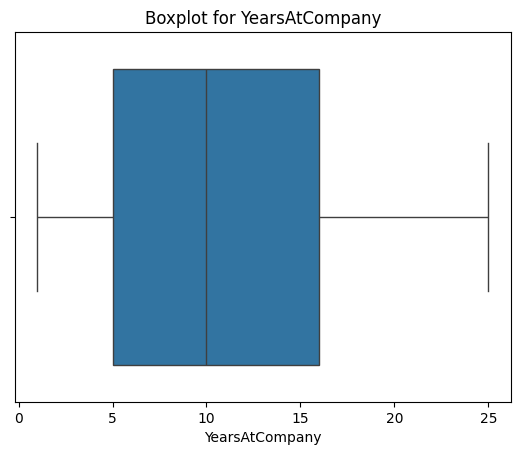

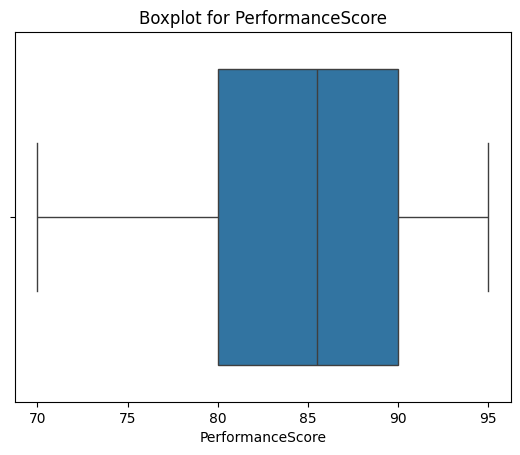

Attrition Probability by Performance Score:
PerformanceScore
70    0.333333
72    0.000000
75    0.500000
76    0.000000
77    0.500000
78    0.600000
79    0.200000
80    0.111111
81    0.666667
82    0.000000
83    0.333333
84    0.500000
85    0.500000
86    0.400000
87    0.750000
88    0.428571
89    0.400000
90    0.200000
91    0.400000
92    0.571429
93    0.666667
94    0.333333
95    0.333333
Name: Attrition, dtype: float64
Bayesian Probability (Attrition | Low Performance): 0.26666666666666666
ANOVA Results: F-statistic = 25.7811, P-value = 0.0000
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.50      0.57      0.53         7

    accuracy                           0.65        20
   macro avg       0.62      0.63      0.63        20
weighted avg       0.66      0.65      0.65        20



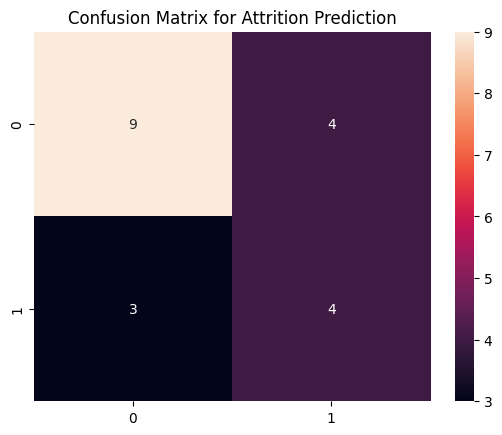

R-squared: 0.7487625823959088
MSE: 0.02052509206858384


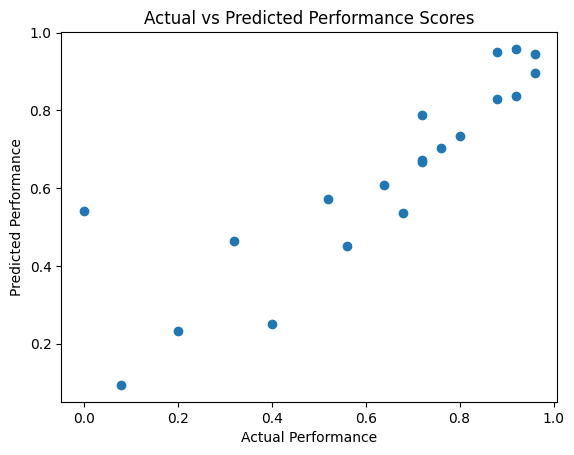

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
NN - Performance MSE: 0.09094372898318012


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
NN Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.69      0.67        13
           1       0.33      0.29      0.31         7

    accuracy                           0.55        20
   macro avg       0.49      0.49      0.49        20
weighted avg       0.53      0.55      0.54        20

Attrition Rate by Department:
Department
3    0.538462
0    0.428571
1    0.346154
2    0.200000
Name: Attrition, dtype: float64


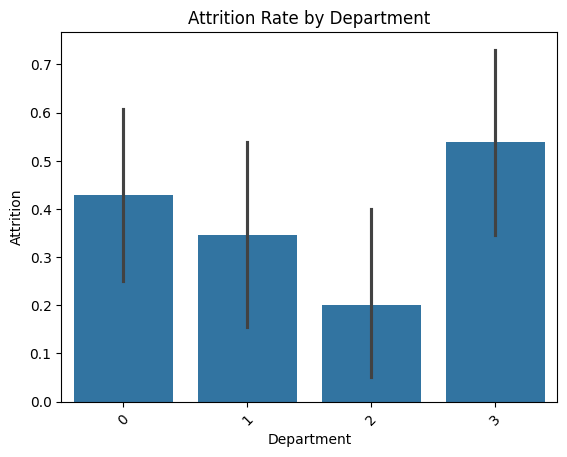

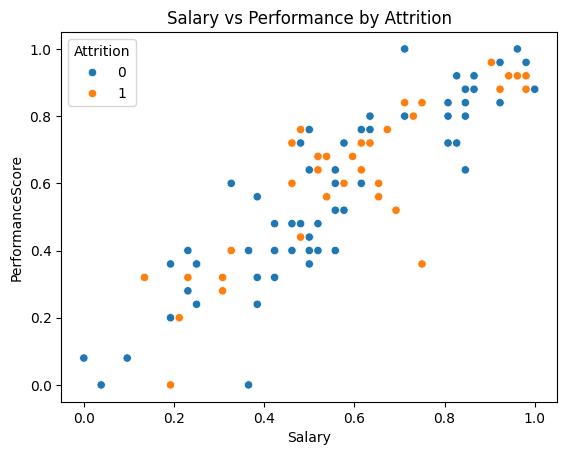

In [1]:
# Employee Performance and Retention Analysis Project

# Phase 1: Data Collection and Exploratory Data Analysis (EDA)

# Step 1: Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score

# Deep Learning Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 2: Upload and Load the Dataset in Google Colab
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('employee_data - employee_data.csv')

# Step 3: Data Preprocessing
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df['Department'] = df['Department'].str.strip().str.title()

# Step 4: Descriptive Statistics
print("Summary Statistics:")
print(df.describe(include='all'))

# Step 5: Exploratory Data Analysis
sns.pairplot(df, hue='Attrition')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

for col in ['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

# Step 6: Probability & Statistical Analysis
print("Attrition Probability by Performance Score:")
print(df.groupby('PerformanceScore')['Attrition'].apply(lambda x: (x=='Yes').mean()))

low_perf = df['PerformanceScore'] <= df['PerformanceScore'].quantile(0.25)
p_low_perf_given_attr = ((df['Attrition']=='Yes') & low_perf).sum() / (df['Attrition']=='Yes').sum()
p_attr = (df['Attrition']=='Yes').mean()
p_low_perf = low_perf.mean()
bayes_prob = (p_low_perf_given_attr * p_attr) / p_low_perf
print("Bayesian Probability (Attrition | Low Performance):", bayes_prob)

departments = df['Department'].unique()
grouped_scores = [df[df['Department'] == dept]['PerformanceScore'] for dept in departments]
f_stat, p_val = stats.f_oneway(*grouped_scores)
print(f"ANOVA Results: F-statistic = {f_stat:.4f}, P-value = {p_val:.4f}")

# Phase 2: Predictive Modeling

# Feature Encoding and Scaling
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
df['Department'] = le.fit_transform(df['Department'])

scaler = MinMaxScaler()
df[['Salary', 'PerformanceScore']] = scaler.fit_transform(df[['Salary', 'PerformanceScore']])

# Classification Model
X_cls = df.drop(columns=['Attrition', 'EmployeeID', 'Name'])
y_cls = df['Attrition']
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)
clf_model = RandomForestClassifier()
clf_model.fit(X_train_cls, y_train_cls)
y_pred_cls = clf_model.predict(X_test_cls)
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_cls))
sns.heatmap(confusion_matrix(y_test_cls, y_pred_cls), annot=True, fmt='d')
plt.title('Confusion Matrix for Attrition Prediction')
plt.show()

# Regression Model
X_reg = df.drop(columns=['PerformanceScore', 'EmployeeID', 'Name'])
y_reg = df['PerformanceScore']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)
print("R-squared:", r2_score(y_test_reg, y_pred_reg))
print("MSE:", mean_squared_error(y_test_reg, y_pred_reg))
plt.scatter(y_test_reg, y_pred_reg)
plt.xlabel("Actual Performance")
plt.ylabel("Predicted Performance")
plt.title("Actual vs Predicted Performance Scores")
plt.show()

# Phase 3: Deep Learning Models

# Neural Network for Performance Prediction
nn_perf = Sequential([
    Dense(32, activation='relu', input_shape=(X_reg.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)
])
nn_perf.compile(optimizer='adam', loss='mse')
nn_perf.fit(X_train_reg, y_train_reg, epochs=50, verbose=0)
y_nn_perf = nn_perf.predict(X_test_reg)
print("NN - Performance MSE:", mean_squared_error(y_test_reg, y_nn_perf))

# Neural Network for Attrition Classification
nn_attr = Sequential([
    Dense(32, activation='relu', input_shape=(X_cls.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn_attr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_attr.fit(X_train_cls, y_train_cls, epochs=50, verbose=0)
nn_pred_cls = (nn_attr.predict(X_test_cls) > 0.5).astype("int32")
print("NN Classification Report:")
print(classification_report(y_test_cls, nn_pred_cls))

# Phase 4: Insights and Reporting

# Key Insights
print("Attrition Rate by Department:")
print(df.groupby('Department')['Attrition'].mean().sort_values(ascending=False))

# Visualizations for Reporting
sns.barplot(x='Department', y='Attrition', data=df)
plt.title('Attrition Rate by Department')
plt.xticks(rotation=45)
plt.show()

sns.scatterplot(x='Salary', y='PerformanceScore', hue='Attrition', data=df)
plt.title('Salary vs Performance by Attrition')
plt.show()


